# Analysis of Wilson loop means
## Import
### Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
from tqdm import tqdm_notebook
sns.set_style("whitegrid")

### Data

In [2]:
PATH = '../Output/'

In [3]:
data = pd.DataFrame()
for i, result in tqdm_notebook(enumerate(glob.glob(f'{PATH}*.csv'))):
    if i == 0:
        data = pd.read_csv(result, names=['R', 'T', f'W_{i}'], header=0)
    else:
        try:
            data[f'W_{i}'] = pd.read_csv(result, usecols=['Mean'])['Mean'].values.astype(np.float64)
        except pd.io.common.EmptyDataError:
            print(f'{result} is empty')

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [4]:
data.head()

,R,T,W_0,W_1,W_2,W_3,W_4,W_5,W_6,W_7,...,W_1188,W_1189,W_1190,W_1191,W_1192,W_1193,W_1194,W_1195,W_1196,W_1197
0,1,1,0.613370,0.613915,0.613636,0.613076,0.613866,0.613480,0.613393,0.613742,...,0.613415,0.613486,0.613694,0.613698,0.613594,0.613318,0.613856,0.613334,0.613501,0.613523
1,1,2,0.409613,0.410582,0.410037,0.409318,0.410456,0.409893,0.410233,0.410004,...,0.409547,0.410054,0.410278,0.410009,0.409972,0.409816,0.410481,0.409962,0.409769,0.409971
2,1,3,0.278851,0.280007,0.279490,0.278552,0.279830,0.279387,0.279550,0.279124,...,0.278844,0.279625,0.279485,0.279220,0.279108,0.279254,0.279730,0.279295,0.279140,0.279264
3,1,4,0.190863,0.191853,0.191193,0.190295,0.191622,0.191370,0.191233,0.190929,...,0.190415,0.191401,0.191400,0.190868,0.190841,0.191263,0.191646,0.191302,0.191112,0.191090
4,1,5,0.130702,0.131843,0.131067,0.130019,0.131387,0.131273,0.131258,0.130722,...,0.130265,0.130982,0.131216,0.130491,0.130594,0.131191,0.131315,0.131261,0.130966,0.131001


In [5]:
split = [y for y in data.columns if 'W_' in y]
for i, config in enumerate(split):
    vr = []
    for r in range(1, np.max(data['R'])+1):
        w = data.loc[data.R == r, f'W_{i}'].values
        vr += list(np.log([w[j]/w[j+1] for j in range(len(w)-1)])) + [-1]
    data[f'V_{i}'] = vr
data['Ws'] = list(data[split].values)
data.drop(columns=split, inplace=True)

/home/giles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [6]:
data.head()

,R,T,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,...,V_1189,V_1190,V_1191,V_1192,V_1193,V_1194,V_1195,V_1196,V_1197,Ws
0,1,1,0.403754,0.402279,0.403153,0.403997,0.402506,0.403250,0.402281,0.403406,...,0.402867,0.402662,0.403323,0.403246,0.403175,0.402431,0.402845,0.403589,0.403132,"[0.6133695100095117, 0.6139145105375342, 0.613..."
1,1,2,0.384536,0.382762,0.383283,0.384886,0.383086,0.383299,0.383543,0.384510,...,0.382841,0.383885,0.384179,0.384488,0.383586,0.383506,0.383797,0.383879,0.383930,"[0.4096131012683888, 0.41058232075961476, 0.41..."
2,1,3,0.379123,0.378087,0.379683,0.381032,0.378659,0.378390,0.379692,0.379756,...,0.379078,0.378586,0.380419,0.380158,0.378470,0.378174,0.378416,0.378854,0.379412,"[0.2788509674644183, 0.28000707642180395, 0.27..."
3,1,4,0.378634,0.375116,0.377573,0.380891,0.377374,0.376933,0.376324,0.378828,...,0.379313,0.377517,0.380274,0.379346,0.376998,0.378054,0.376665,0.377923,0.377537,"[0.19086266539196164, 0.19185265506626395, 0.1..."
4,1,5,0.380265,0.374168,0.377384,0.381353,0.373926,0.378710,0.375644,0.378692,...,0.377141,0.379008,0.381432,0.379703,0.376930,0.375486,0.376292,0.377012,0.376006,"[0.1307019700130703, 0.13184293829318722, 0.13..."


In [7]:
split = [y for y in data.columns if 'V_' in y]
data['Vs'] = list(data[split].values)
data.drop(columns=split, inplace=True)

In [8]:
data.head()

,R,T,Ws,Vs
0,1,1,"[0.6133695100095117, 0.6139145105375342, 0.613...","[0.4037544851743117, 0.40227923823129075, 0.40..."
1,1,2,"[0.4096131012683888, 0.41058232075961476, 0.41...","[0.3845355864230413, 0.382761570784814, 0.3832..."
2,1,3,"[0.2788509674644183, 0.28000707642180395, 0.27...","[0.3791233322496774, 0.37808721990564526, 0.37..."
3,1,4,"[0.19086266539196164, 0.19185265506626395, 0.1...","[0.3786344467574562, 0.37511630315525957, 0.37..."
4,1,5,"[0.1307019700130703, 0.13184293829318722, 0.13...","[0.38026487018348976, 0.3741681395878691, 0.37..."


## Jackknife

In [9]:
def jackknife(in_vals):
    vals_sum = np.sum(in_vals)
    if vals_sum != vals_sum: #Contains NaNs
        vals = [i for i in in_vals if i == i]
        vals_sum = np.sum(vals)
        
    else:
        vals = in_vals
        
    jk = np.zeros_like(vals)
    n = len(vals)
    
    for i in range(n):
        jk[i] = (vals_sum-vals[i])
    jk /= n-1
    
    mean = np.mean(jk)
    std = np.sqrt((len(jk)-1)*np.sum((jk-mean)**2)/len(jk))
    return mean, std

In [10]:
jk_means = data.apply(lambda row: jackknife(row['Ws']), axis=1)
data['Mean_W'] = [x[0] for x in jk_means]
data['Std_W'] = [x[1] for x in jk_means] 

jk_means = data.apply(lambda row: jackknife(row['Vs']), axis=1)
data['Mean_V'] = [x[0] for x in jk_means]
data['Std_V'] = [x[1] for x in jk_means] 

## Plotting
### W(R,T)

In [11]:
def uncertRound(value, uncert):
    if uncert == 0:
        return value, uncert
    i = 0    
    while uncert*(10**i) <= 1:
        i += 1

    roundUncert = round(uncert, i)
    roundValue = round(value, i)
    if int(roundUncert) == roundUncert:
        roundUncert = int(roundUncert)
        roundValue = int(roundValue)
    return roundValue, roundUncert

In [12]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

In [13]:
def plotW(data, logy=False):
    fits = {}
    
    with sns.color_palette('tab20', len(set(data['R']))):
        fig = plt.figure(figsize=(16,8))
        for i, r in enumerate(list(set(data['R']))):
            #Scatter
            x = data.loc[data.R == r, 'T']
            y = data.loc[data.R == r, 'Mean_W']
            err = data.loc[data.R == r, 'Std_W']
            plt.errorbar(x, y, yerr=err, fmt='o', color=sns.color_palette()[i], label='')
            
            #Exp fit
            fit, conv = curve_fit(exponenial_func, x, y, p0=(0.5, 1, 0.001), sigma=err)
            xx = np.linspace(np.min(x), np.max(x), 1000)
            yy = exponenial_func(xx, *fit)
            fits[r] = (fit, conv)
            
            #Uncertainty
            coef = []
            unc = np.sqrt(np.diag(conv))
            for j in range(len(fit)):
                coef.append(uncertRound(fit[j], unc[j]))
                
            plt.plot(xx, yy, color=sns.color_palette()[i],
                     label='W({},T) = {}±{} x exp({}±{} x T) + {}±{}'.format(r,
                                                                             coef[0][0], coef[0][1],
                                                                             coef[1][0], coef[1][1],
                                                                             coef[2][0], coef[2][1],))

        plt.legend(loc='best', fontsize=16)
        plt.xticks(fontsize=16, color='black')
        plt.yticks(fontsize=16, color='black')
        plt.ylabel("W(R,T)", fontsize=24, color='black')
        plt.xlabel('T', fontsize=24, color='black')
        if logy: plt.yscale('log')
        plt.show()
    return fits

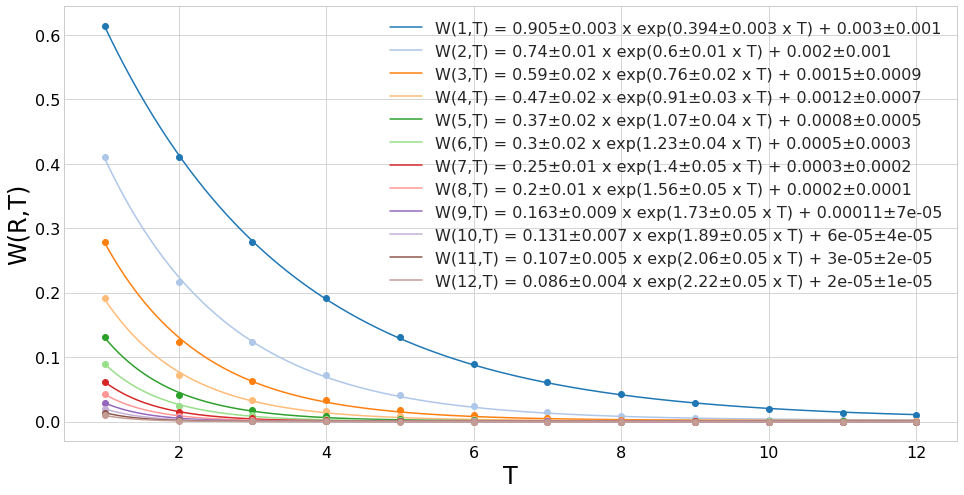

In [14]:
expFits = plotW(data)

### V(R)

In [15]:
def const_func(x, a):
    return np.ones_like(x)*a

In [16]:
t_ranges = {1:(6, 12),
            2:(6, 10),
            3:(5, 9),
            4:(5, 8),
            5:(5, 9),
            6:(4, 8)}

In [17]:
def plotV(data):
    palette = 'tab20'
    if len(t_ranges) < 10:
        palette = 'tab10'
    with sns.color_palette(palette, len(t_ranges)):
        
        fits = {}
        for i, r in enumerate(t_ranges):
            fig = plt.figure(figsize=(16,8))

            #scatter
            cut = (data.R == r) & (data['T'] >= t_ranges[r][0]) & (data['T'] <= t_ranges[r][1]) 
            x = data.loc[cut, 'T'].values[:-1]
            y = data.loc[cut, 'Mean_V'].values[:-1]
            err = data.loc[cut, 'Std_V'].values[:-1]

            plt.errorbar(x, y, yerr=err, fmt='o', color=sns.color_palette()[i], label='')

            #constant fit
            fit, conv = curve_fit(const_func, x, y, p0=(0.5), sigma=err)
            xx = np.linspace(np.min(x), np.max(x), 1000)
            yy = const_func(xx, *fit)
            coef = uncertRound(fit[0], np.sqrt(np.diag(conv))[0])
            
            #Chi2
            chi = (y - const_func(x, *fit)) / err
            chi2 = (chi**2).sum()
            dof = len(x) - len(fit)
            red_chi2 = (chi2 / dof)
            
            plt.plot(xx, yy, label=r'$V(' + str(r) + r')=' + str(coef[0]) + r'\pm' + str(coef[1]) + \
                     r',\ \ \ \frac{\chi^2}{N_\mathrm{dof}}=$' + '{:.2f}'.format(red_chi2),
                     color=sns.color_palette()[i])

            fits[r] = (fit, conv)

            plt.legend(loc='best', fontsize=16)
            plt.xticks(fontsize=16, color='black')
            plt.yticks(fontsize=16, color='black')
            plt.ylabel(f"V({r})", fontsize=24, color='black')
            plt.xlabel('T', fontsize=24, color='black')
            #plt.yscale('log')
            plt.show()

    return fits

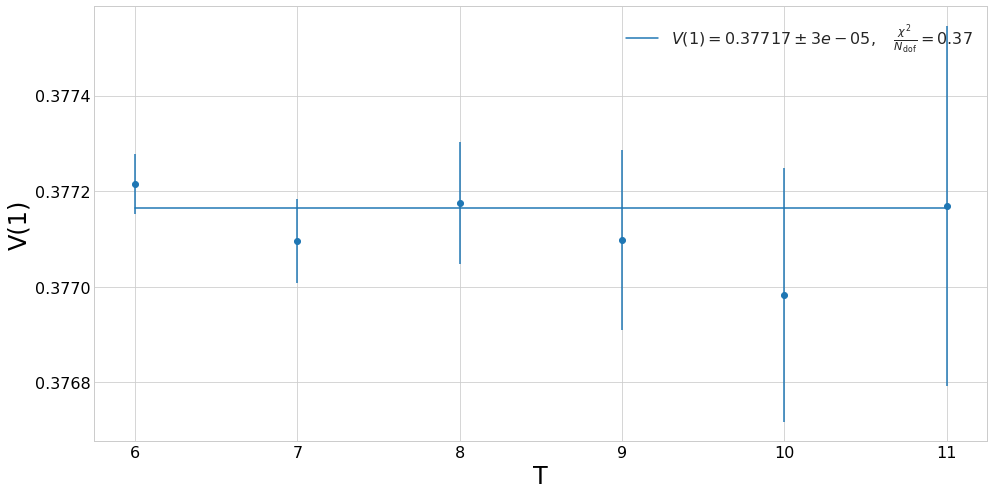

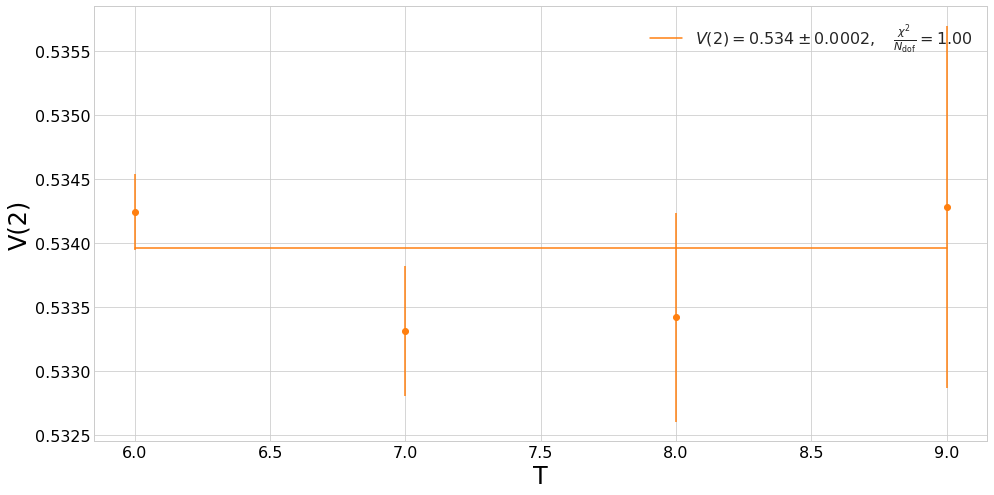

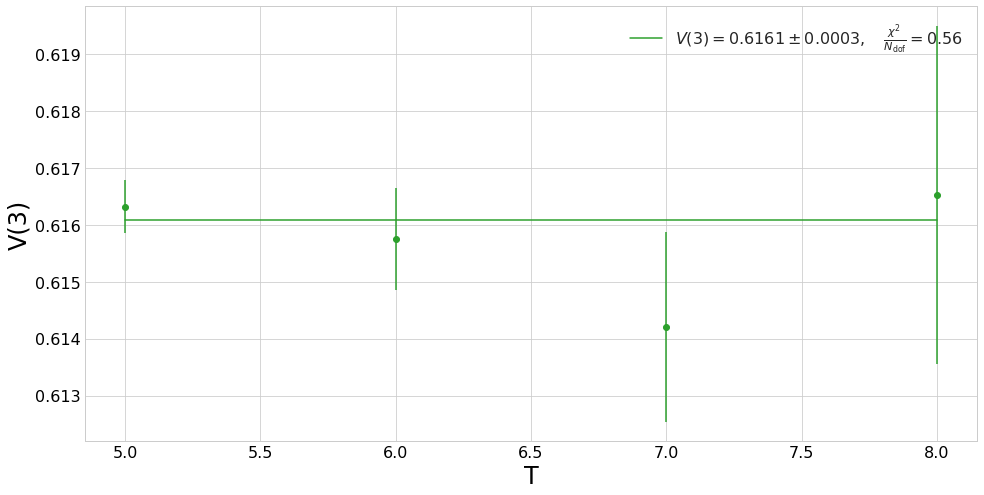

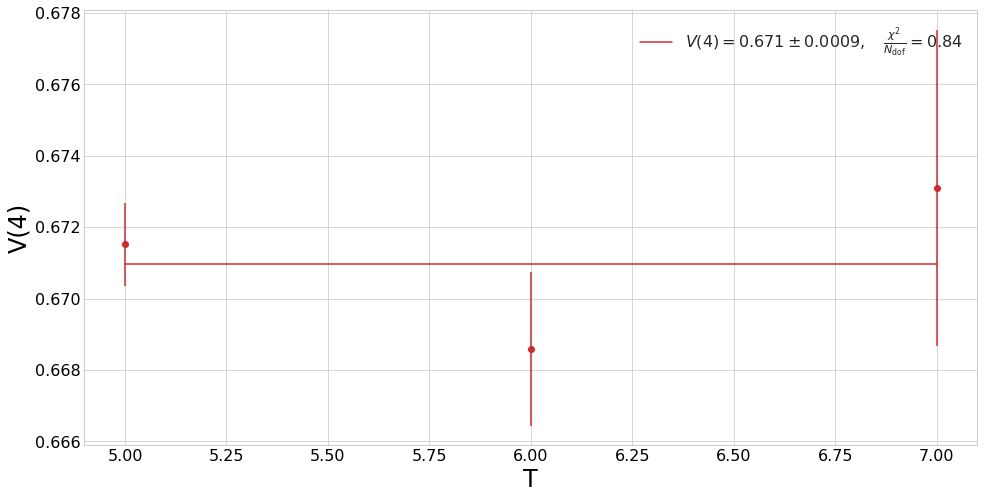

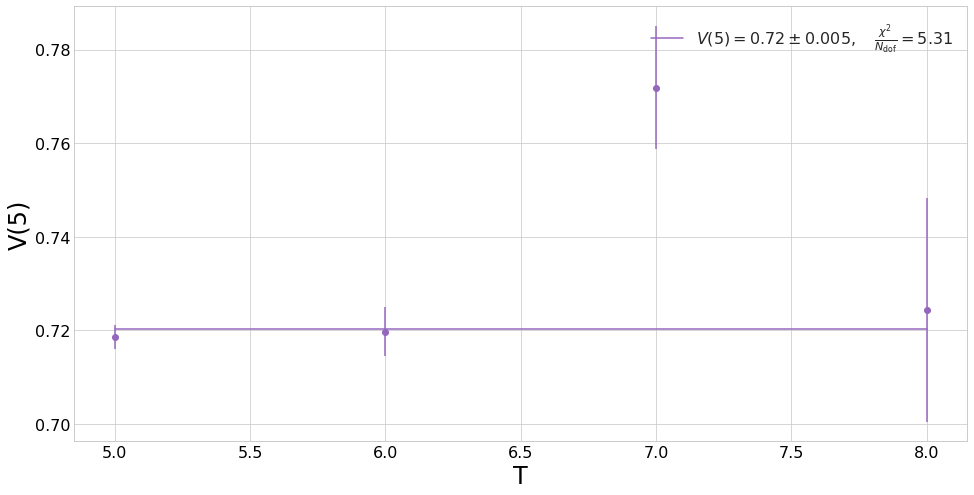

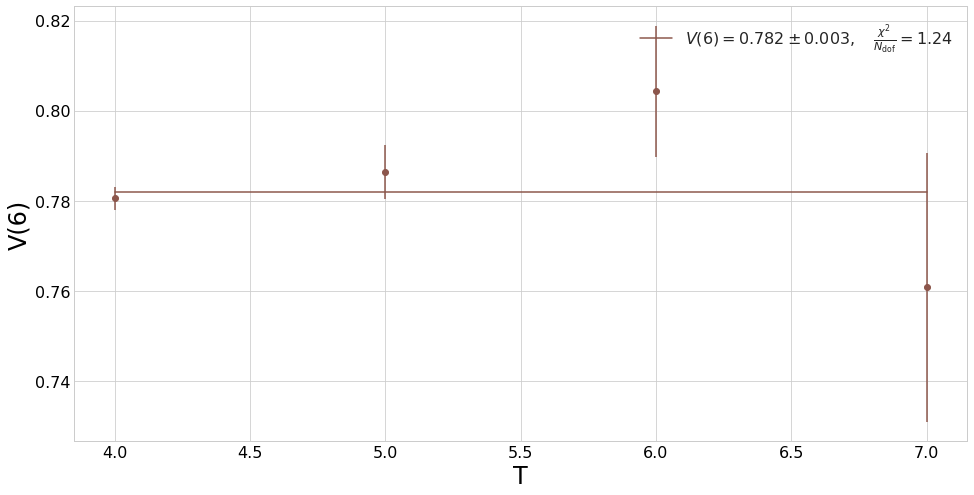

In [18]:
constFits = plotV(data)

In [19]:
def funnel_func(x, a, b, c):
    return (a/x) + b + (c*x)

In [20]:
def plotVR(fits):
    x = np.array([r for r in fits])
    v = [fits[r] for r in fits]
    coefs = np.array([(fits[r][0][0], np.sqrt(np.diag(fits[r][1]))[0]) for r in fits])
    
    fig = plt.figure(figsize=(16,8))
    plt.errorbar(x, coefs[:,0], yerr=coefs[:,1], fmt='o', label='', color=sns.color_palette()[0])
    
    #Funnel fit
    fit, conv = curve_fit(funnel_func, x, coefs[:,0], p0=(0.1, 0.4, 0.1), sigma=coefs[:,1])
    xx = np.linspace(np.min(x), np.max(x), 1000)
    yy = funnel_func(xx, *fit)
    
    #Uncertainty
    coef = []
    unc = np.sqrt(np.diag(conv))
    for j in range(len(fit)):
        coef.append(uncertRound(fit[j], unc[j]))
        
    #Chi2
    chi = (coefs[:,0] - funnel_func(x, *fit)) / coefs[:,1]
    chi2 = (chi**2).sum()
    dof = len(x) - len(fit)
    red_chi2 = (chi2 / dof)

    plt.plot(xx, yy, color=sns.color_palette()[0],
             label=r'$V(R) = ' + str(coef[0][0]) + r'\pm' + str(coef[0][1]) + r'\times\frac{1}{R} + ' \
                   + str(coef[1][0]) + r'\pm' + str(coef[1][1]) \
                   + r'\,[GeV]+' + str(coef[2][0]) + r'\pm' + str(coef[2][1]) \
                   + r'\times R\,[GeV^2],\ \ \ \frac{\chi^2}{N_\mathrm{dof}}=$' + '{:.2f}'.format(red_chi2))
    
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16, color='black')
    plt.yticks(fontsize=16, color='black')
    plt.ylabel(f"V(R)", fontsize=24, color='black')
    plt.xlabel('R', fontsize=24, color='black')
    plt.show()

    return fit, conv

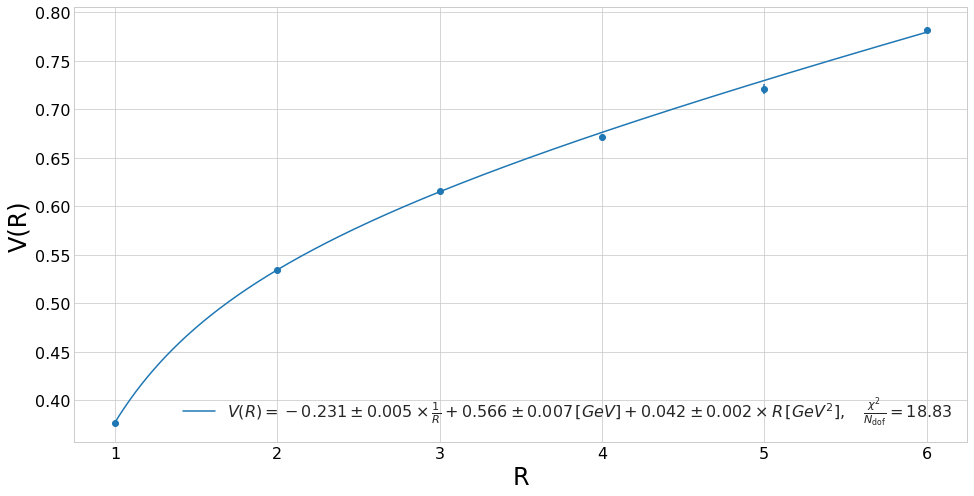

In [21]:
fit, conv = plotVR(constFits)